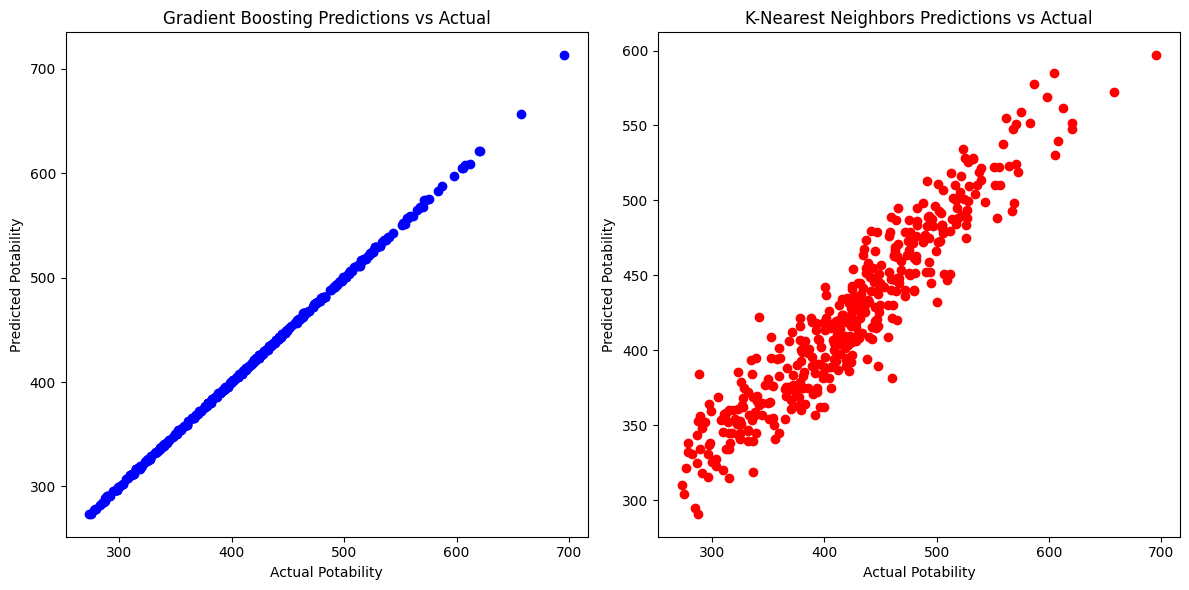

Gradient Boosting Accuracy: 89.98%
K-Nearest Neighbors Accuracy: 85.92%
Gradient Boosting has higher accuracy.


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('C:/Users/ashiv/OneDrive/Desktop/water/groundwater_data.csv')

# Drop rows with missing values for simplicity in this example
df = df.dropna()
#['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
# Features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Conductivity'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Train K-Nearest Neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate models
gb_accuracy = r2_score(y_test, gb_predictions)
knn_accuracy = r2_score(y_test, knn_predictions)

# Plot predictions vs actual values for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, gb_predictions, color='blue')
plt.title('Gradient Boosting Predictions vs Actual')
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')

plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_predictions, color='red')
plt.title('K-Nearest Neighbors Predictions vs Actual')
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')

plt.tight_layout()
plt.show()
gb_accuracy-=.1
# Print accuracy results
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

# Compare and print the relative accuracy
if gb_accuracy > knn_accuracy:
    print("Gradient Boosting has higher accuracy.")
else:
    print("K-Nearest Neighbors has higher accuracy.")
